Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Reading data into dataframe

In [2]:
df = pd.read_excel("sydney_rain prediction.xlsx")


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
# shape of data

rows, cols = df.shape
print("The dataset has {} rows and {} columns".format(rows,cols))

The dataset has 3337 rows and 17 columns


In [5]:
# datatypes of columns

df.dtypes

Date            datetime64[ns]
Location                object
MinTemp                float64
MaxTemp                float64
Rainfall               float64
Evaporation            float64
Sunshine               float64
Humidity9am            float64
Humidity3pm            float64
Pressure9am            float64
Pressure3pm            float64
Cloud9am               float64
Cloud3pm               float64
Temp9am                float64
Temp3pm                float64
RainToday               object
RainTomorrow            object
dtype: object

In [6]:
# info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

Dropping Date and location columns

In [7]:
df = df.drop('Date', axis=1)

In [8]:
df = df.drop('Location', axis=1)

In [9]:
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


One hot encoding RainToday and RainTomorrow columns

In [10]:
for item in df.RainToday:
    if item == 'Yes':
        df["RainToday"].replace(item,1,inplace=True)
    elif item == 'No':
        df["RainToday"].replace(item,0,inplace=True)

C:\Users\sidha\AppData\Local\Temp\ipykernel_46852\7079897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RainToday"].replace(item,1,inplace=True)
C:\Users\sidha\AppData\Local\Temp\ipykernel_46852\7079897.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [11]:
for item in df.RainTomorrow:
    if item == 'Yes':
        df["RainTomorrow"].replace(item,1,inplace=True)
    elif item == 'No':
        df["RainTomorrow"].replace(item,0,inplace=True)

C:\Users\sidha\AppData\Local\Temp\ipykernel_46852\3650619727.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RainTomorrow"].replace(item,1,inplace=True)
C:\Users\sidha\AppData\Local\Temp\ipykernel_46852\3650619727.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Splitting into input data X and output variable y

In [12]:
X = df.copy()
X = X.drop('RainTomorrow', axis=1) 
y = df["RainTomorrow"]

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int64

Checking for null values

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      3334 non-null   float64
 1   MaxTemp      3335 non-null   float64
 2   Rainfall     3331 non-null   float64
 3   Evaporation  3286 non-null   float64
 4   Sunshine     3321 non-null   float64
 5   Humidity9am  3323 non-null   float64
 6   Humidity3pm  3324 non-null   float64
 7   Pressure9am  3317 non-null   float64
 8   Pressure3pm  3318 non-null   float64
 9   Cloud9am     2771 non-null   float64
 10  Cloud3pm     2776 non-null   float64
 11  Temp9am      3333 non-null   float64
 12  Temp3pm      3333 non-null   float64
 13  RainToday    3331 non-null   float64
dtypes: float64(14)
memory usage: 365.1 KB


In [15]:
# missing values in data

X.isna().sum()

MinTemp          3
MaxTemp          2
Rainfall         6
Evaporation     51
Sunshine        16
Humidity9am     14
Humidity3pm     13
Pressure9am     20
Pressure3pm     19
Cloud9am       566
Cloud3pm       561
Temp9am          4
Temp3pm          4
RainToday        6
dtype: int64

<Axes: >

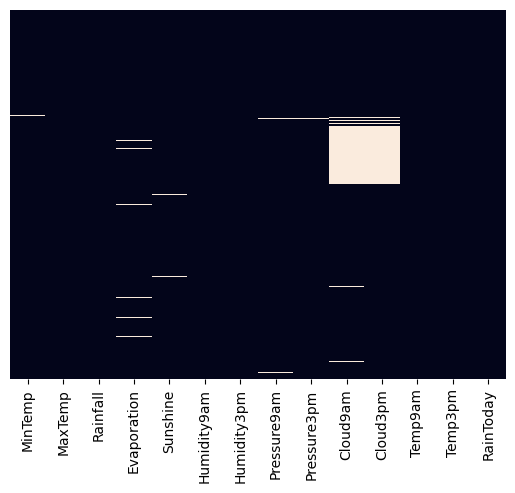

In [16]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False)

In [17]:
percent_missing = X.isnull().sum() * 100 / len(X)
percent_missing = percent_missing.to_dict()
for i in percent_missing:
    if percent_missing[i] > 10:
        print(i, percent_missing[i])

Cloud9am 16.961342523224452
Cloud3pm 16.811507341923885


So, we will impute the missing values with the mean

In [18]:
for i in list(X):
    X[i].fillna(value= X[i].mean(), inplace=True)


C:\Users\sidha\AppData\Local\Temp\ipykernel_46852\1790658299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[i].fillna(value= X[i].mean(), inplace=True)


In [19]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259982
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438296
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000


<Axes: >

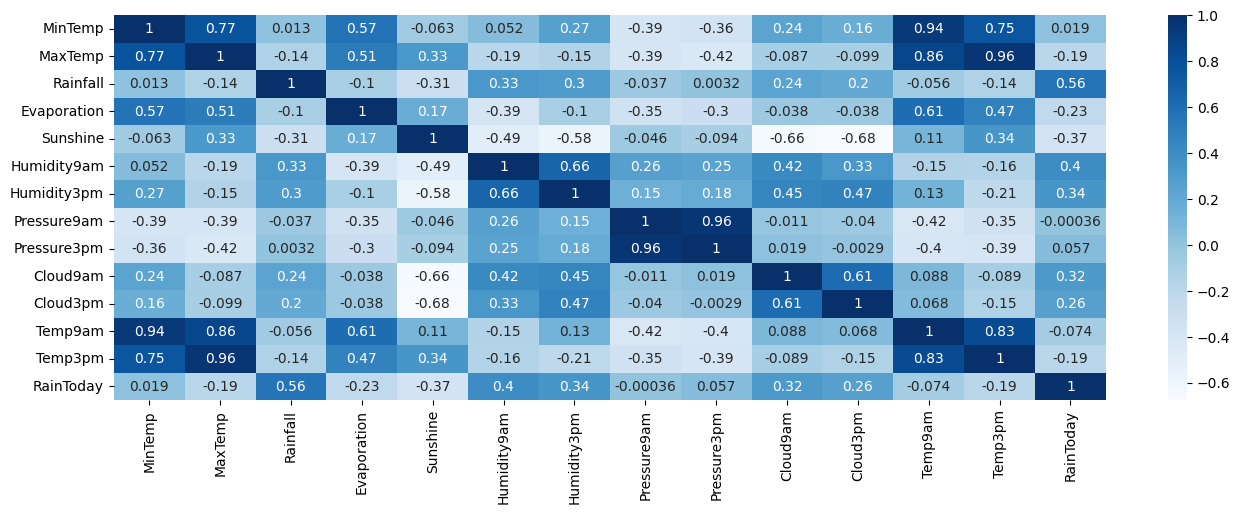

In [20]:
plt.figure(figsize=(16,5))
sns.heatmap(X.corr(),cmap='Blues',annot=True) 

Split into train, test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Training Classification Tree

In [22]:
from sklearn import tree

In [23]:
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [24]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

Predicted values using trained model

In [25]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

Model performance

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

In [27]:
#The lower the better
mean_squared_error(y_test, y_test_pred)

0.19419237749546278

In [28]:
#The higher the better
r2_score(y_train, y_train_pred)

0.08264925373134335

In [29]:
r2_score(y_test, y_test_pred)

0.02985375485941133

In [30]:
accuracy_score(y_train, y_train_pred)

0.8277404921700223

In [31]:
accuracy_score(y_test, y_test_pred)

0.8058076225045372

Bagging: "Bagging," short for Bootstrap Aggregating, is a machine learning ensemble method that improves model stability and accuracy by creating multiple models from random subsets of the training data and combining their predictions. The process involves bootstrapping (sampling with replacement) to create these subsets, training a base model on each subset, and then aggregating their outputs (e.g., through averaging for regression or majority vote for classification) to reduce variance and the risk of overfitting. A well-known example of a bagging algorithm is the Random Forest. 

In [32]:
clftree1 = tree.DecisionTreeClassifier()

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_clf = BaggingClassifier(base_estimator=clftree1, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [35]:
bag_clf.fit(X_train, y_train)

C:\Users\sidha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [36]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[748,  49],
       [137, 168]], dtype=int64)

In [37]:
accuracy_score(y_train, bag_clf.predict(X_train))

1.0

In [38]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.8312159709618875

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42, bootstrap=True)

In [38]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [51]:
accuracy_score(y_train, rf_clf.predict(X_train))

1.0

In [ ]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.823049001814882

In [40]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[749,  48],
       [147, 158]], dtype=int64)

Using grid search in random forests

In [41]:
from sklearn.model_selection import GridSearchCV

max features: This parameter controls the maximum number of features (columns) that the model considers for the best possible split when building an individual decision tree. It is particularly important for models like Random Forest, which is an ensemble of many decision trees. 
min samples split: This parameter controls the minimum number of samples required to split an internal node in a decision tree.

In [42]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
               "min_samples_split": [2,3,10]}

The cv parameter tells GridSearchCV how to split the data for evaluation. With cv=5, the following process is repeated for every combination of hyperparameters: 

    The dataset is divided into five equal-sized "folds" or subsets.
    The model is trained on four of these folds, which are combined to form the training set.
    The trained model's performance is then evaluated on the single remaining fold, which serves as the validation set.
    This process is repeated five times, with each of the five folds serving as the validation set exactly once.
    The scores from each of the five validation runs are averaged to get a single, more reliable performance metric for that specific hyperparameter combination. 

In [43]:
grid_search = GridSearchCV(rf_clf, param_grid=params_grid, n_jobs=-1, cv=5, scoring="accuracy")

In [44]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [45]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [46]:
cvrf_clf = grid_search.best_estimator_

In [49]:
accuracy_score(y_train, cvrf_clf.predict(X_train))

1.0

In [47]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.8357531760435571

In [48]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[756,  41],
       [140, 165]], dtype=int64)